#Lab 2 路不平偵測

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
%cd /content/gdrive/Shareddrives/GPS_IMU/

/content/gdrive/Shareddrives/GPS_IMU


##載入記錄檔

1. 左邊選單上傳"1.csv, 2.csv, 3.csv"

In [ ]:
round = pd.read_csv("/content/gdrive/Shareddrives/GPS_IMU/2.csv")
round

,Timestamp,Gyroscope_x,Gyroscope_y,Gyroscope_z,Accelerometer_x,Accelerometer_y,Accelerometer_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Latitude,Longitude,Altitude,Speed
0,1677898362819,NaN,NaN,NaN,NaN,NaN,NaN,51.406750,-14.740224,-7.376217,NaN,NaN,NaN,NaN
1,1677898362830,0.024683,0.100839,-0.090778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1677898362834,NaN,NaN,NaN,0.083496,-0.965530,-0.250137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1677898362936,NaN,NaN,NaN,NaN,NaN,NaN,51.942543,-15.355870,-8.012829,NaN,NaN,NaN,NaN
4,1677898362941,0.049236,0.079568,-0.009956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,1677898567220,0.015720,0.062986,-0.001929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6296,1677898567226,NaN,NaN,NaN,0.072678,-1.012634,-0.232376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6297,1677898567320,NaN,NaN,NaN,NaN,NaN,NaN,48.838081,-15.228162,-6.926533,NaN,NaN,NaN,NaN
6298,1677898567337,-0.073992,-0.092695,0.025810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
r = round.ffill()
r

,Timestamp,Gyroscope_x,Gyroscope_y,Gyroscope_z,Accelerometer_x,Accelerometer_y,Accelerometer_z,Magnetometer_x,Magnetometer_y,Magnetometer_z,Latitude,Longitude,Altitude,Speed
0,1677898362819,NaN,NaN,NaN,NaN,NaN,NaN,51.406750,-14.740224,-7.376217,NaN,NaN,NaN,NaN
1,1677898362830,0.024683,0.100839,-0.090778,NaN,NaN,NaN,51.406750,-14.740224,-7.376217,NaN,NaN,NaN,NaN
2,1677898362834,0.024683,0.100839,-0.090778,0.083496,-0.965530,-0.250137,51.406750,-14.740224,-7.376217,NaN,NaN,NaN,NaN
3,1677898362936,0.024683,0.100839,-0.090778,0.083496,-0.965530,-0.250137,51.942543,-15.355870,-8.012829,NaN,NaN,NaN,NaN
4,1677898362941,0.049236,0.079568,-0.009956,0.083496,-0.965530,-0.250137,51.942543,-15.355870,-8.012829,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,1677898567220,0.015720,0.062986,-0.001929,0.068329,-0.922791,-0.246201,48.765305,-15.212167,-7.050144,24.788651,120.999571,83.764802,0.0
6296,1677898567226,0.015720,0.062986,-0.001929,0.072678,-1.012634,-0.232376,48.765305,-15.212167,-7.050144,24.788651,120.999571,83.764802,0.0
6297,1677898567320,0.015720,0.062986,-0.001929,0.072678,-1.012634,-0.232376,48.838081,-15.228162,-6.926533,24.788651,120.999571,83.764802,0.0
6298,1677898567337,-0.073992,-0.092695,0.025810,0.072678,-1.012634,-0.232376,48.838081,-15.228162,-6.926533,24.788651,120.999571,83.764802,0.0


2. 觀察輸入資料

- ![](https://docs-assets.developer.apple.com/published/96e9d46b41/c9b606b2-9a52-487e-8385-e710ffa1ce5f.png)


<AxesSubplot:xlabel='Timestamp'>

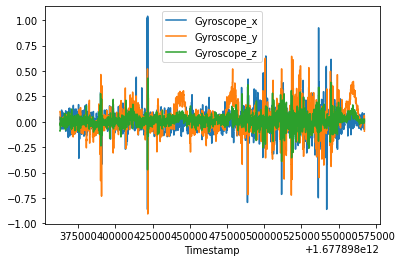

In [ ]:
# 陀螺儀 rotation
r.plot(x='Timestamp', y=['Gyroscope_x','Gyroscope_y','Gyroscope_z'])

<AxesSubplot:xlabel='Timestamp'>

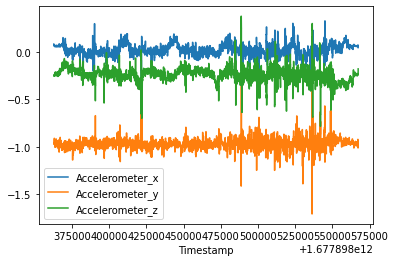

In [ ]:
# 加速度感測器 G
r.plot(x='Timestamp', y=['Accelerometer_x','Accelerometer_y','Accelerometer_z'])

<AxesSubplot:xlabel='Timestamp'>

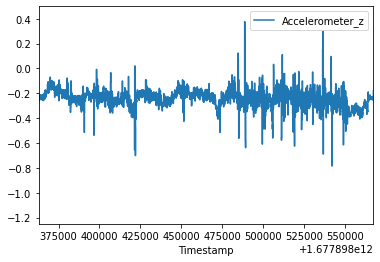

In [ ]:
# r.plot(x='Timestamp', y=['Accelerometer_z'],xlim=(1677898055220,1677898265775),ylim=(-1,-0.5)) #1
r.plot(x='Timestamp', y=['Accelerometer_z'],xlim=(1677898362819,1677898567342),ylim=(-1.25,0.5)) #2


##Task1-計算震幅並畫出
- ![](https://i.imgur.com/JeZeFcu.png)

6300
6300


<ipython-input-22-233497703e21>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Accelerometer_Average'][j:i] = g0
<ipython-input-22-233497703e21>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['Accelerometer_Average'][j:] = g0


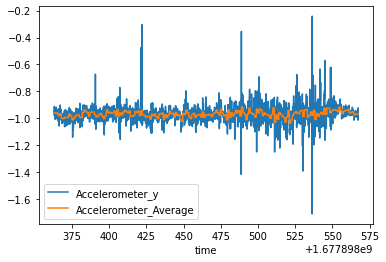

In [ ]:
######### Task #########
# Calculate Amptitude


"""
The scalar projection of gi to g0 is called ga
"""
# ms to s
r['time'] = r['Timestamp']/1000 

# find the indices of outliers using z-score method
z_scores = np.abs((r['Accelerometer_y'] - np.mean(r['Accelerometer_y'])) / np.std(r['Accelerometer_y']))
outlier_indices = np.where(z_scores > 3)[0]
# print(outlier_indices)

# remove outliers and fill the mean value

# drop the outliers
# cleaned_data = r['Accelerometer_y'].drop(outlier_indices)

# Replace the outliers with the mean value
cleaned_data = r['Accelerometer_y'].copy()
cleaned_data.loc[outlier_indices] = np.nan
cleaned_data = cleaned_data.fillna(cleaned_data.mean())
print(len(cleaned_data))

# Take the average of every 1 sec for all Accelerometer_y as a vertical upward vector and called by g0
j = 0
average_list = []
r['Accelerometer_Average'] = np.zeros(len(r['Accelerometer_y']))
print(len(r['Accelerometer_Average']))
for i in range(0, len(cleaned_data), 1):
    if (r['time'][i] - r['time'][j]) >= 1:
        g0 = cleaned_data[j:i].mean()
        # Fill the g0 into r['Accelerometer_Average'][i:j]
        r['Accelerometer_Average'][j:i] = g0
        average_list.append(g0)
        j = i

# Fill the latest g0 into last 0.xx sec
r['Accelerometer_Average'][j:] = g0
    
# print(len(average_list)) # len is 202

# save the new csv file
r.to_csv("/content/gdrive/Shareddrives/GPS_IMU/2_new.csv", index=True)

# plot the r['Accelerometer_Average'] and r['Accelerometer_y']

r.plot(x = 'time', y = ['Accelerometer_y', 'Accelerometer_Average'])
plt.show()

# Calculate Average Amptitude
# average_amp = -0.98 #Change this


#########

In [ ]:
# Plot Amptitude Graph
r.plot(x='Timestamp', y=['Amptitude'])

KeyError: ignored

##Task2-挑出異常震動點

In [ ]:
######### Task #########



#########

## Task3-畫GPS點至地圖上

In [ ]:
#下載地圖
######### Task #########
!gdown --id 1_rUFNWCCFTu4YzFUEG2YVL1dARRiLCLK

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_rUFNWCCFTu4YzFUEG2YVL1dARRiLCLK
To: /content/gdrive/Shareddrives/GPS_IMU/map.jpg
100% 74.3k/74.3k [00:00<00:00, 19.8MB/s]


In [ ]:
class GPSVis(object):
    """
        Class for GPS data visualization using pre-downloaded OSM map in image format.
    """
    def __init__(self, data_path, map_path, points):
        """
        :param data_path: Path to file containing GPS records.
        :param map_path: Path to pre-downloaded OSM map in image format.
        :param points: Upper-left, and lower-right GPS points of the map (lat1, lon1, lat2, lon2).
        """
        self.data_path = data_path
        self.points = points
        self.map_path = map_path

        self.result_image = Image
        self.x_ticks = []
        self.y_ticks = []

    def plot_map(self, output='save', save_as='resultMap.png'):
        """
        Method for plotting the map. You can choose to save it in file or to plot it.
        :param output: Type 'plot' to show the map or 'save' to save it.
        :param save_as: Name and type of the resulting image.
        :return:
        """
        self.get_ticks()
        fig, axis1 = plt.subplots(figsize=(10, 10))
        axis1.imshow(self.result_image)
        axis1.set_xlabel('Longitude')
        axis1.set_ylabel('Latitude')
        axis1.set_xticklabels(self.x_ticks)
        axis1.set_yticklabels(self.y_ticks)
        axis1.grid()
        if output == 'save':
            plt.savefig(save_as)
        else:
            plt.show()

    def create_image(self, color, width=2):
        """
        Create the image that contains the original map and the GPS records.
        :param color: Color of the GPS records.
        :param width: Width of the drawn GPS records.
        :return:
        """
        data = pd.read_csv(self.data_path, names=['LATITUDE', 'LONGITUDE'], sep=',')

        self.result_image = Image.open(self.map_path, 'r')
        img_points = []
        gps_data = tuple(zip(data['LATITUDE'].values, data['LONGITUDE'].values))
        draw = ImageDraw.Draw(self.result_image)
        for d in gps_data:
            x1, y1 = self.scale_to_img(d, (self.result_image.size[0], self.result_image.size[1]))
            draw.ellipse([(x1-2, y1-2),(x1+2, y1+2)], fill=color,width=width)
            #print(img_points)
        

    def scale_to_img(self, lat_lon, h_w):
        """
        Conversion from latitude and longitude to the image pixels.
        It is used for drawing the GPS records on the map image.
        :param lat_lon: GPS record to draw (lat1, lon1).
        :param h_w: Size of the map image (w, h).
        :return: Tuple containing x and y coordinates to draw on map image.
        """
        # https://gamedev.stackexchange.com/questions/33441/how-to-convert-a-number-from-one-min-max-set-to-another-min-max-set/33445
        old = (self.points[2], self.points[0])
        new = (0, h_w[1])
        y = ((lat_lon[0] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        old = (self.points[1], self.points[3])
        new = (0, h_w[0])
        x = ((lat_lon[1] - old[0]) * (new[1] - new[0]) / (old[1] - old[0])) + new[0]
        # y must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        return x, h_w[1] - y

    def get_ticks(self):
        """
        Generates custom ticks based on the GPS coordinates of the map for the matplotlib output.
        :return:
        """
        self.x_ticks = map(
            lambda x: round(x, 4),
            np.linspace(self.points[1], self.points[3], num=7))
        y_ticks = map(
            lambda x: round(x, 4),
            np.linspace(self.points[2], self.points[0], num=8))
        # Ticks must be reversed because the orientation of the image in the matplotlib.
        # image - (0, 0) in upper left corner; coordinate system - (0, 0) in lower left corner
        self.y_ticks = sorted(y_ticks, reverse=True)


In [ ]:
#from gps_class import GPSVis

vis = GPSVis(data_path='/content/data.txt',
             map_path='/content/map.jpg',  # Path to map downloaded from the OSM.
             points=(24.789664521572398, 120.99518219793899, 24.787270842564535, 120.99897215920797)) # Two coordinates of the map (upper left, lower right)

vis.create_image(color=(255, 0, 0), width=3)  # Set the color and the width of the GNSS tracks.
vis.plot_map(output='save')

print()


FileNotFoundError: ignored

##Task4-叢集演算法

In [ ]:
######### Task #########